# Problem

# Data Preparation

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [424]:
car_sales = pd.read_csv('CarPrice_Assignment.csv')

In [425]:
car_sales.shape

(205, 26)

In [426]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Converting `car_ID` as the index and then dropping `car_ID` column as it will not have any impact on the analysis

In [427]:
car_sales.index = car_sales['car_ID']

car_sales = car_sales.drop('car_ID',axis=1)

In [428]:
car_sales

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [429]:
car_sales['companyname'] = car_sales['CarName'].str.split(' ').str[0]

In [430]:
car_sales['companyname'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
renault         2
maxda           2
porcshce        1
Nissan          1
toyouta         1
vokswagen       1
mercury         1
Name: companyname, dtype: int64

In [431]:
def map_company_name(car_name):
    if car_name == 'vw':
        return 'volkswagen'
    elif car_name == 'maxda':
        return 'mazda'
    elif car_name == 'porcshce':
        return 'porsche'
    elif car_name == 'Nissan':
        return 'nissan'
    elif car_name == 'toyouta':
        return 'toyota'
    elif car_name == 'vokswagen':
        return 'volkswagen'
    else:
        return car_name

In [432]:
car_sales['companyname'] = car_sales['companyname'].apply(map_company_name)

In [433]:
car_sales['companyname'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: companyname, dtype: int64

Removing `CarName` as we have extracted a new column from it.

In [434]:
car_sales = car_sales.drop('CarName', axis=1)

In [435]:
def get_columns_with_nan_percentage(df):
    nan_cols = [{
            "column":c,
            "percentage":round(100*(df[c].isnull().sum()/len(df[c].index)), 2)
            } for c in df.columns if round(100*(df[c].isnull().sum()/len(df[c].index)), 2)>0]
    return pd.DataFrame.from_records(nan_cols)

In [436]:
get_columns_with_nan_percentage(car_sales)

""


We can see that no column has NAN values

# Analysis of the data

Reference for the following methods: https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf#89dd and the previous loan-defaulter case study.


In [437]:
default_figsize = (10, 5)

In [438]:
def categorical_summarized(dataframe,
                           x=None,
                           y=None,
                           hue=None,
                           palette='Set1',
                           verbose=True,
                           figsize=default_figsize,
                           title="",
                           xlabel=None,
                           ylabel=None,
                           rotate_labels=False):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]

    if verbose:
        print(series.describe())
        print('mode: ', series.mode())
        print('=' * 80)
        print(series.value_counts())

    sns.set(rc={'figure.figsize': figsize})
    sorted_df = dataframe.sort_values(column_interested)
    ax = sns.countplot(x=x, y=y, hue=hue, data=sorted_df)

    plt.title(title)
    if not xlabel:
        xlabel = column_interested
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    total = len(dataframe[column_interested])
    if rotate_labels:
        plt.setp(ax.get_xticklabels(),
                 rotation=30,
                 horizontalalignment='right')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
    plt.tight_layout()
    plt.show()

In [439]:
def quantitative_summarized(dataframe,
                            x=None,
                            y=None,
                            hue=None,
                            palette='Set1',
                            ax=None,
                            verbose=True,
                            swarm=False,
                            figsize=default_figsize):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    if verbose:
        print('mode: ', series.mode())
        print('=' * 80)
        print(series.value_counts())
    sns.set(rc={'figure.figsize': figsize})

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x,
                      y=y,
                      hue=hue,
                      data=dataframe,
                      palette=palette,
                      ax=ax)
    plt.tight_layout()
    plt.show()

In [440]:
def plot_column(df,
                col,
                chart_type='Hist',
                dtype=int,
                bins=25,
                figsize=default_figsize):
    temp_df = df[col]
    sns.set(rc={'figure.figsize': figsize})
    if chart_type == 'Hist':
        ax = sns.countplot(temp_df)
    elif chart_type == 'Dens':
        ax = sns.distplot(temp_df)
    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, bins), 2))
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.show()

In [441]:
def univariate_analysis(col,
                        chart_type='Dens',
                        df=car_sales,
                        is_categorical=False,
                        title="",
                        xlabel=None,
                        ylabel=None,
                        rotate_labels=False,
                        bins=25):
    if is_categorical:
        categorical_summarized(df,
                               x=col,
                               title=title,
                               xlabel=xlabel,
                               ylabel=ylabel,
                               rotate_labels=rotate_labels,
                               verbose=False)
    else:
        quantitative_summarized(df, y=col, verbose=False)
        plot_column(df, col, chart_type=chart_type, bins=bins)

In [442]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

## Defining variables

### Categorical Variables

- symboling
- fueltype
- aspiration
- doornumber
- carbody
- drivewheel
- enginelocation
- enginetype
- cylindernumber
- fuelsystem
- companyname

### Continuous Variables

- wheelbase
- carlength
- carwidth
- carheight
- curbweight
- boreratio
- stroke
- compressionratio
- horsepower
- peakrpm
- citympg
- highwaympg

## `price` is the dependent variable, so let us start with the analysis of `price`

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


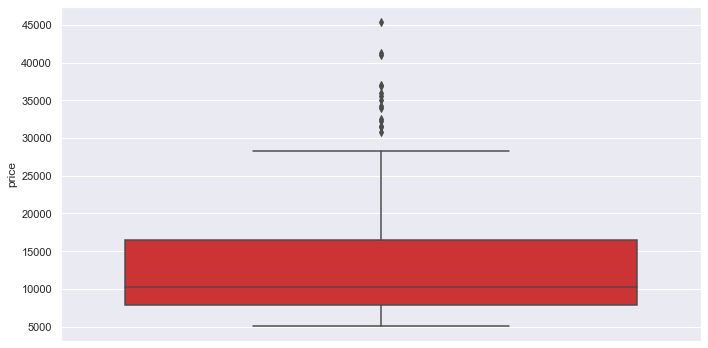

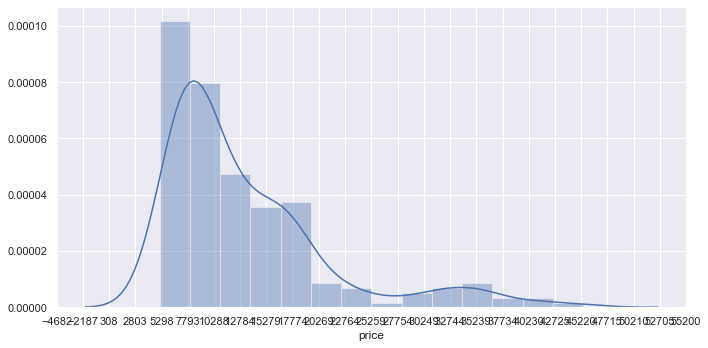

In [443]:
univariate_analysis('price')

We can see that the price is right skewed because we have some cars with price more than `$30000`. More than **`75 percent`** cars have price less than `$17000`. From the graph it is clear there are some outliers however, we can not remove these rows as they are actual data points. 

## Now, we will analyze various variables. We will analyze the variables against price too

### Analyzing categorical variables

In [444]:
def bivariate_analysis(col, df=car_sales, is_categorical=True):
    univariate_analysis(col, is_categorical=is_categorical)
    quantitative_summarized(dataframe=car_sales,
                            y='price',
                            x=col,
                            swarm=True,
                            verbose=False)

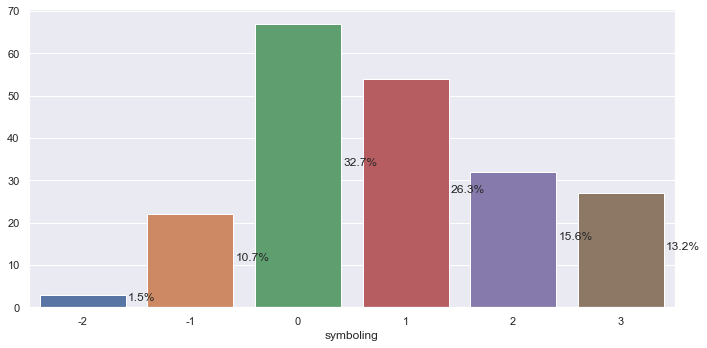

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


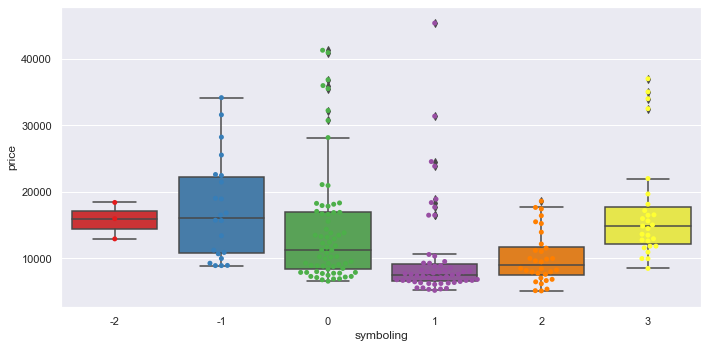

In [445]:
bivariate_analysis('symboling')

We can see that most cars are sold for `symboling` value **0** and **1**. We can also see that the prices for **1** are the lowest. The average price for the cars with `symboling` value less than 0 is high which comes from the fact they have high safety measures (insurance) thus the increased cost. However, the price for the cars with `symboling` 3 has similar prices as `symboling` -2. We can see that there is no clear pattern for the price. Thus, can be dropped.

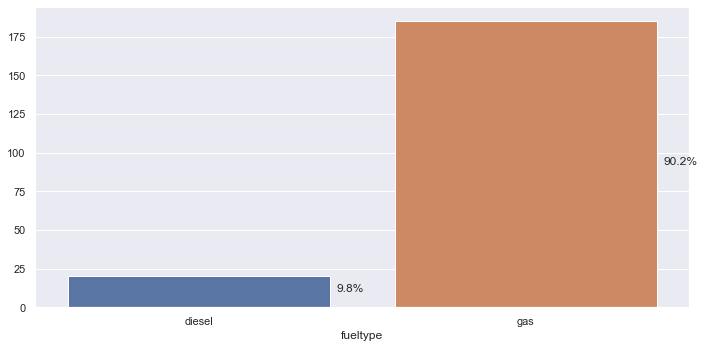

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


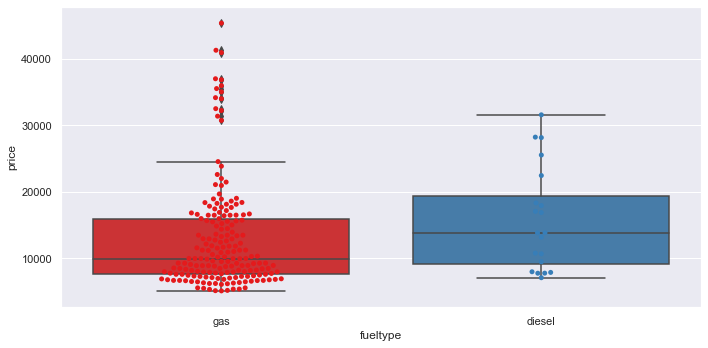

In [446]:
bivariate_analysis('fueltype')

We can see that:
1. `gas` cars the most sold ones
2. The average price of the diesel cars is higher.

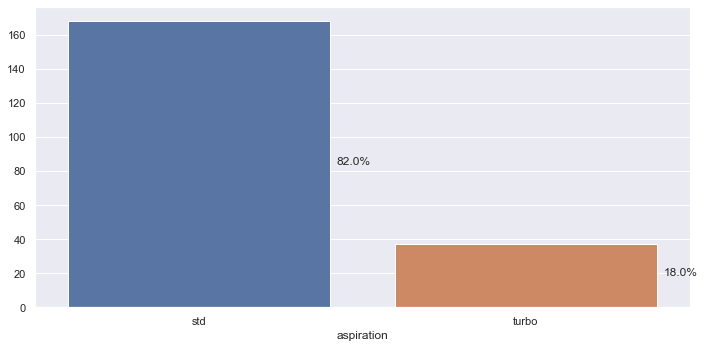

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


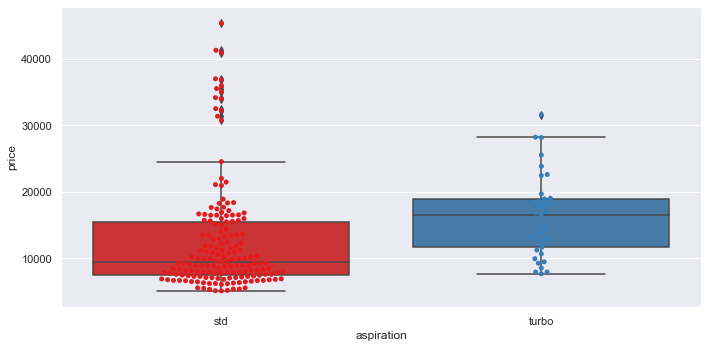

In [447]:
bivariate_analysis('aspiration')

We can see:
1. `std` cars are the most sold ones
2. However, the average price for `turbo` is higher.

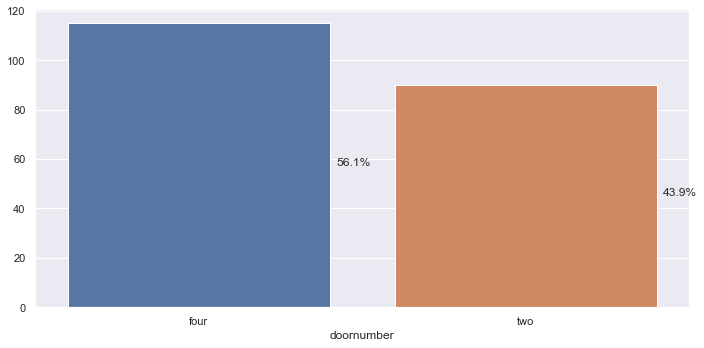

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


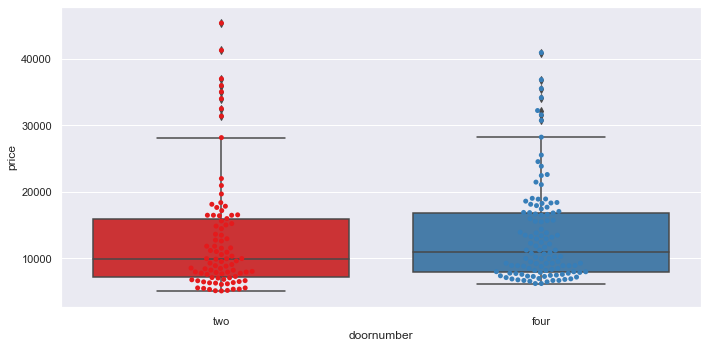

In [448]:
bivariate_analysis('doornumber')

We can that `doornumber` has no significant impact on the prices of the cars. We can drop this column for the model.

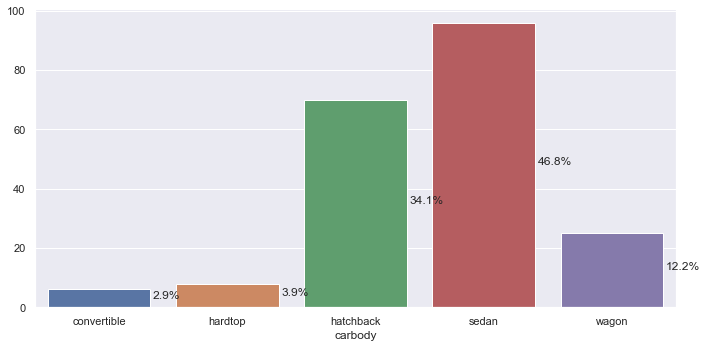

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


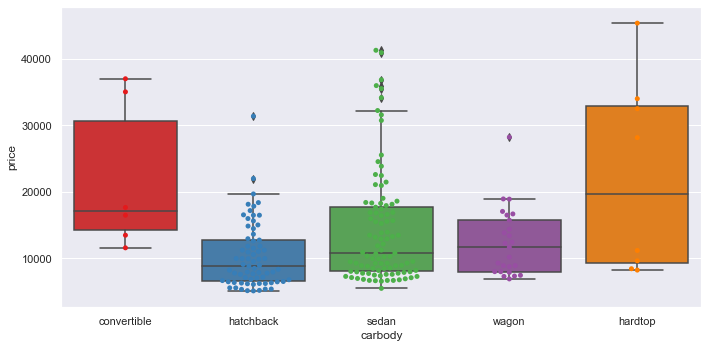

In [449]:
bivariate_analysis('carbody')

We can see:
1. 47% of the sold cars are *sedan* followed by *hatchback*
2. **convertible** are the most expensive ones followed by **hardtop**. 

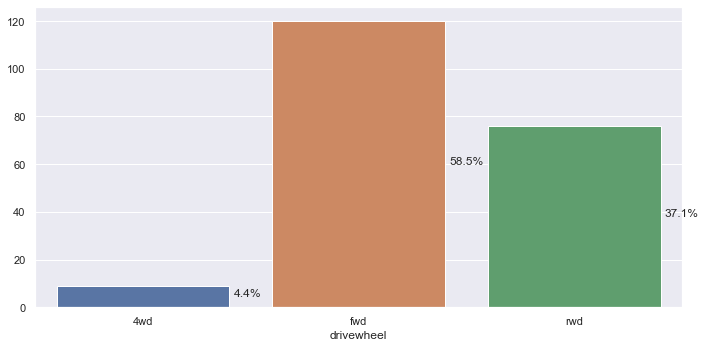

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


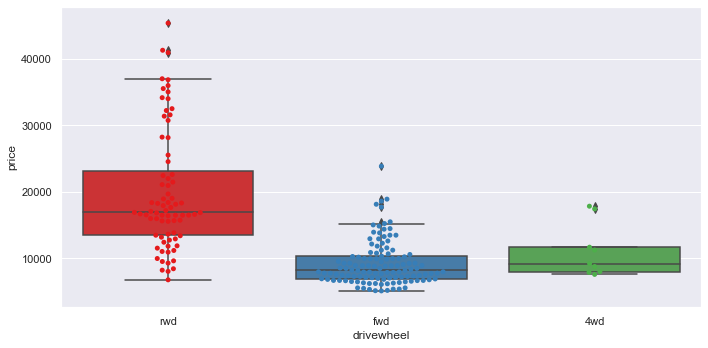

In [450]:
bivariate_analysis('drivewheel')

We can see:
1. **fwd** drive wheel cars are the most sold one followed by **rwd**.
2. **rwd** drive wheel cards are the costlier than the other types.
    

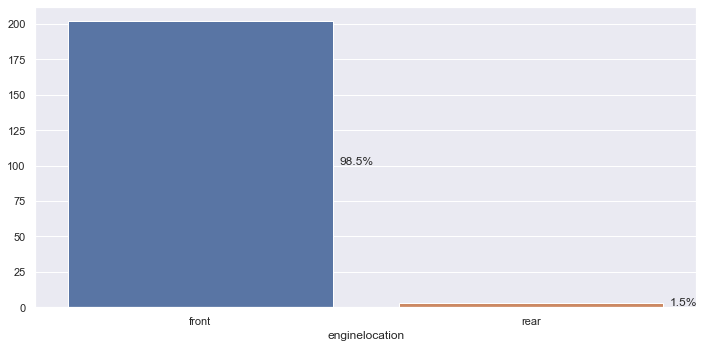

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


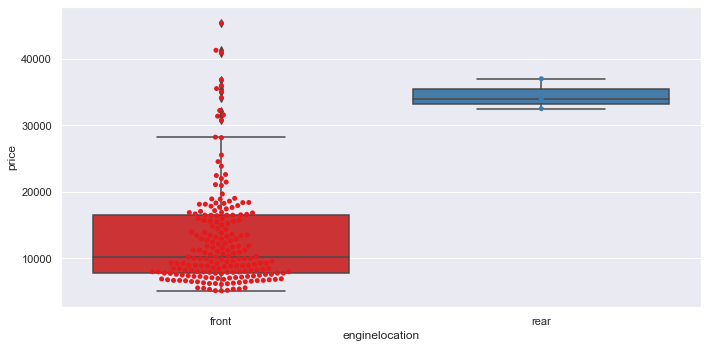

In [451]:
bivariate_analysis('enginelocation')

Almost all the cars sold have front engine. This does not provide any significant insight on the price. We can drop this column for our model.

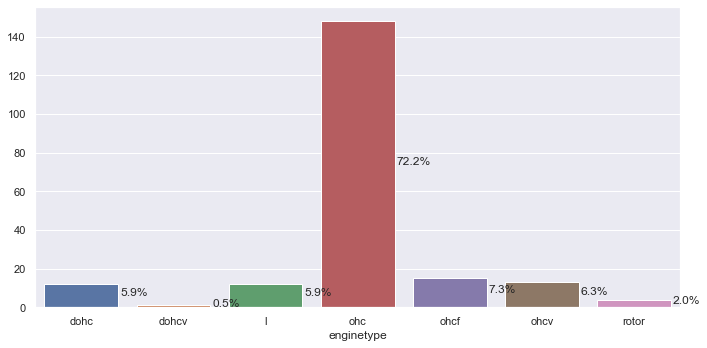

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


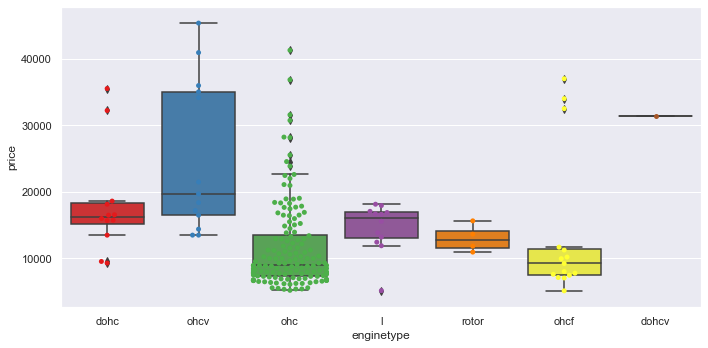

In [452]:
bivariate_analysis('enginetype')

We can see:
1. cars with `ohc` engine are the most sold
2. Also, we can see that the price is also dependent on the engine type.

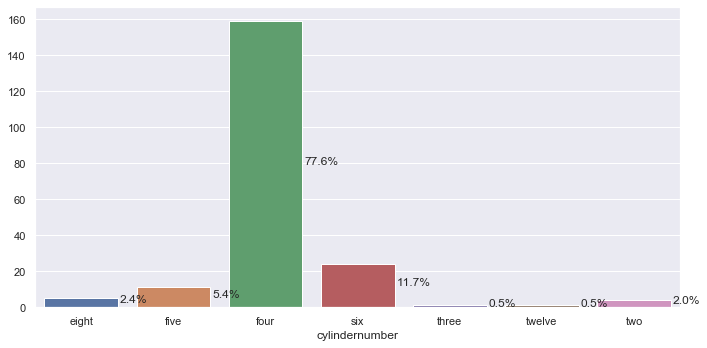

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


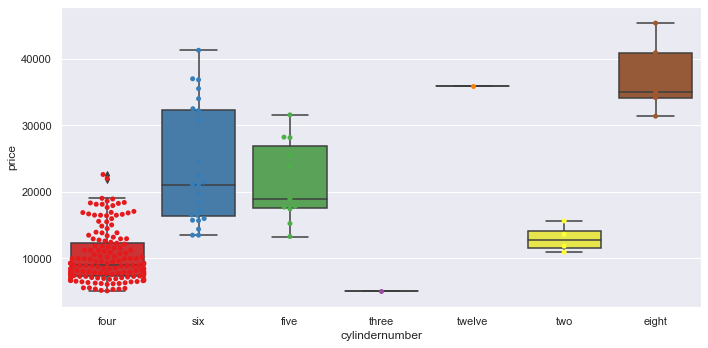

In [453]:
bivariate_analysis('cylindernumber')

We can see:
1. `four` cylinder cars are the most sold ones
2. As the number of cylinders increase, the price of the cars is also increasing.

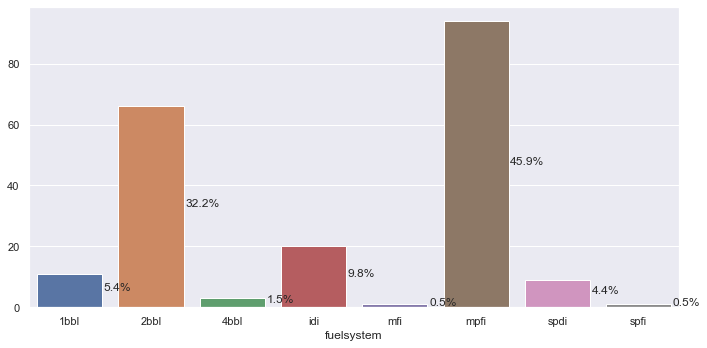

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


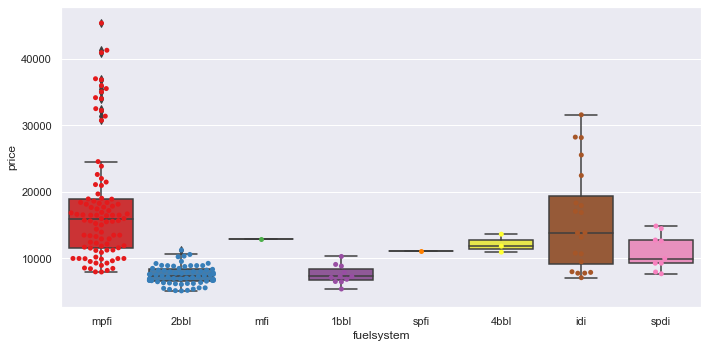

In [454]:
bivariate_analysis('fuelsystem')

We can see:
1. Cars with `mpfi` are the most sold followed by `2bbl` 
2. The price is also distributed across different fuel systems

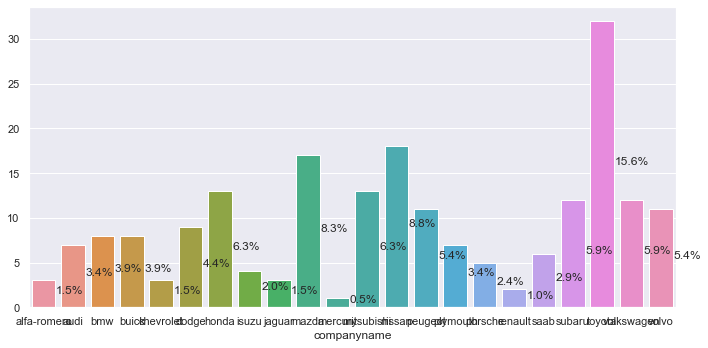

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


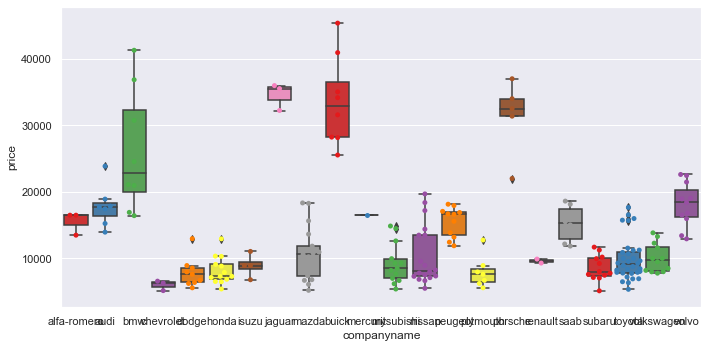

In [455]:
bivariate_analysis('companyname')

#### We can see that, the price varies based on the brand name. If we want to use this variable as the parameter in the model, it will introduce lots of dummy variables. We can use business understanding to reduce the number of dummy variables as suggested in https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/. We can divide the cars into 3 categories based on their price. 

In [456]:
def add_categorical_column(df,
                           bins,
                           column,
                           new_column,
                           interval,
                           verbose=False):
    interval.append(df[column].max() + 1)
    df[new_column] = pd.cut(df[column], interval, right=False, labels=bins)

In [457]:
add_categorical_column(car_sales, ['economy', 'middle_class', 'premium'], 'price',
                       'car_range', [0, 10000, 25000])

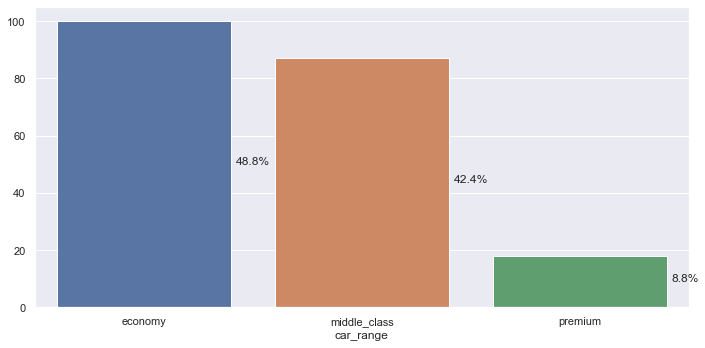

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


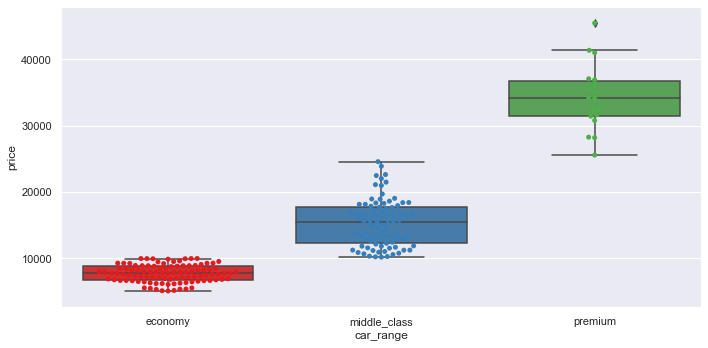

In [458]:
bivariate_analysis('car_range')

We can see:
1. Most of the cars belong to economy and middle_class
2. This variable does have an impact on the price

### Analyzing continuous variables

In [459]:
car_sales_num = car_sales[[
    'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
    'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
    'citympg', 'highwaympg','price'
]]

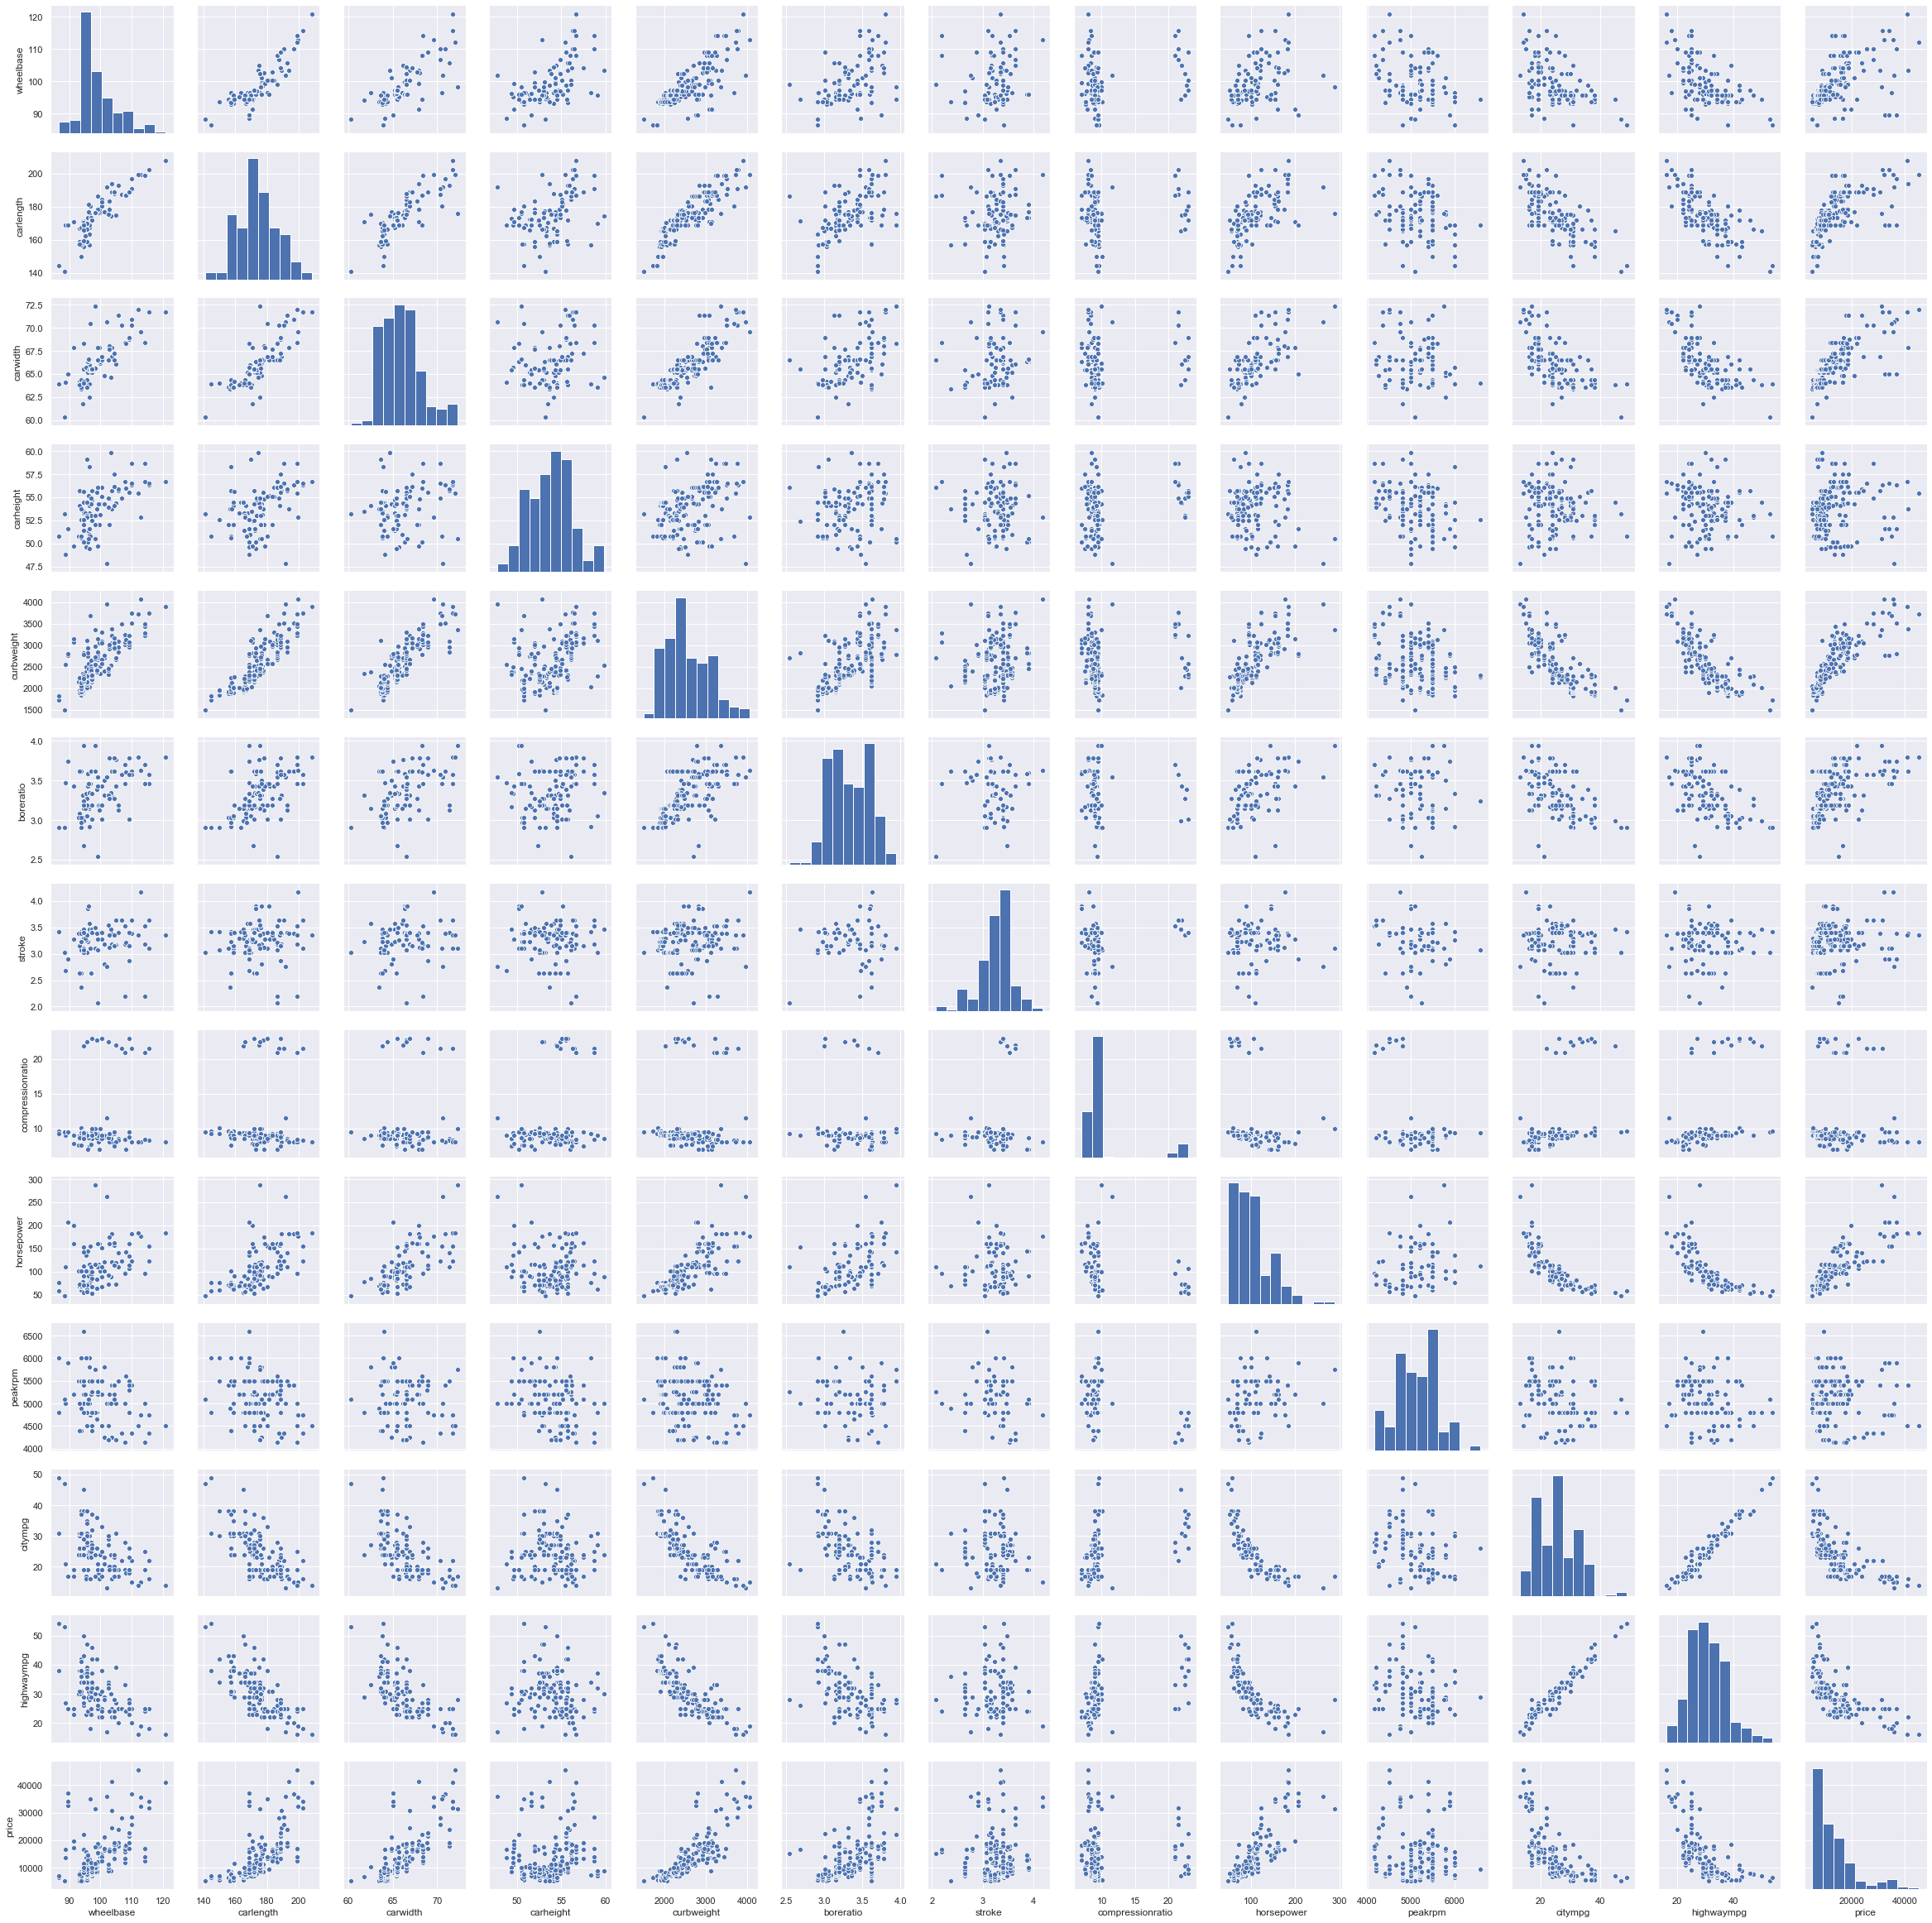

In [460]:
sns.pairplot(car_sales_num)

In [461]:
def heat_map(data):
    corr = data.corr()
    sns.set(rc={'figure.figsize': (15, 10)})
    plt.tight_layout()
    ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu',annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

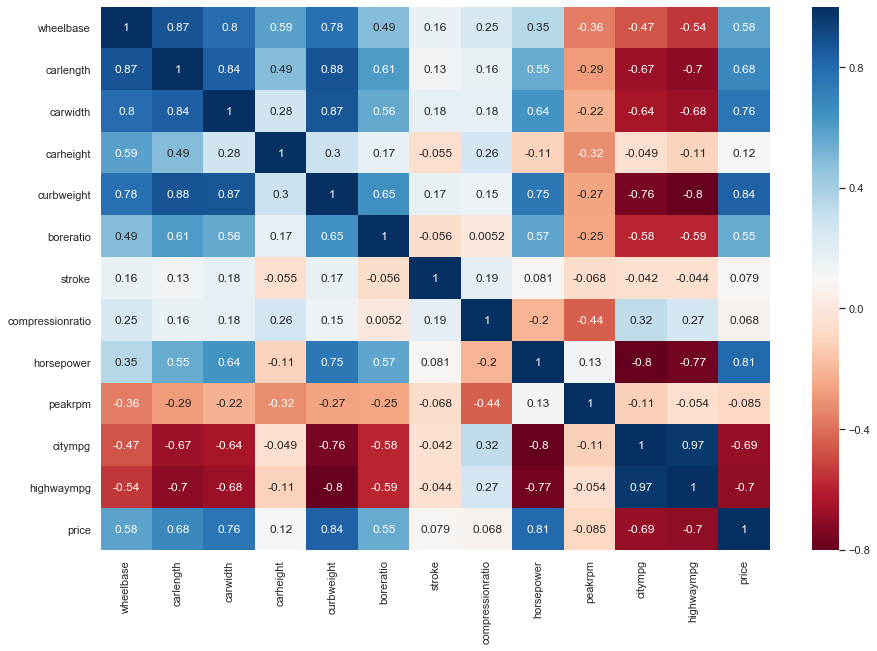

In [462]:
heat_map(car_sales_num)

As we can see that, `citympg` and `highwaympg` have negative impact on the price. And these two variables are highly related to each other too. Also,`peakrpm`, `carheight`, `compressionratio`, `stroke` shows very less correlation with the price, thus can be dropped.

Also, we can create a new variable fuel_economy based on highwaympg and citympg.
```
Fuel Economy = 0.55 * City value + 0.45 * Highway Value
```


In [463]:
car_sales['fuel_economy'] = 0.55*car_sales['citympg'] + 0.45*car_sales['highwaympg']

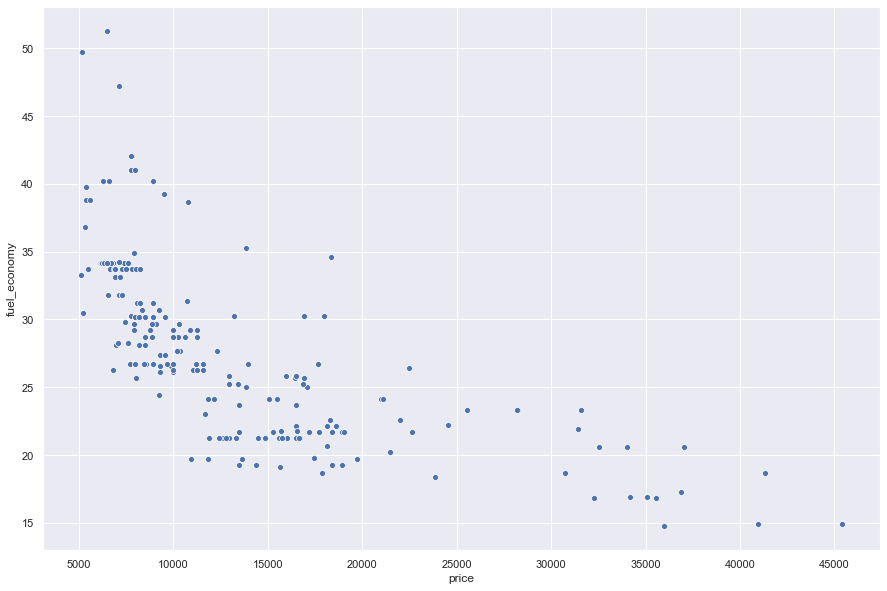

In [464]:
sns.scatterplot('price','fuel_economy',data=car_sales)

We can see that the fuel economy has an impact (negative) on the price.

In [465]:
car_sales.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'companyname', 'car_range',
       'fuel_economy'],
      dtype='object')

After the above analysis, we can select following variables for the models

- fueltype
- aspiration
- carbody
- drivewheel
- enginetype
- cylindernumber
- fuelsystem
- car_range
- wheelbase
- curbweight
- carlength
- carwidth 
- boreratio
- horsepower
- fuel_economy

In [466]:
car_sales_model = car_sales[[
    'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',
    'cylindernumber', 'fuelsystem', 'car_range', 'wheelbase', 'curbweight',
    'carlength', 'carwidth', 'boreratio', 'horsepower', 'fuel_economy', 'price'
]]

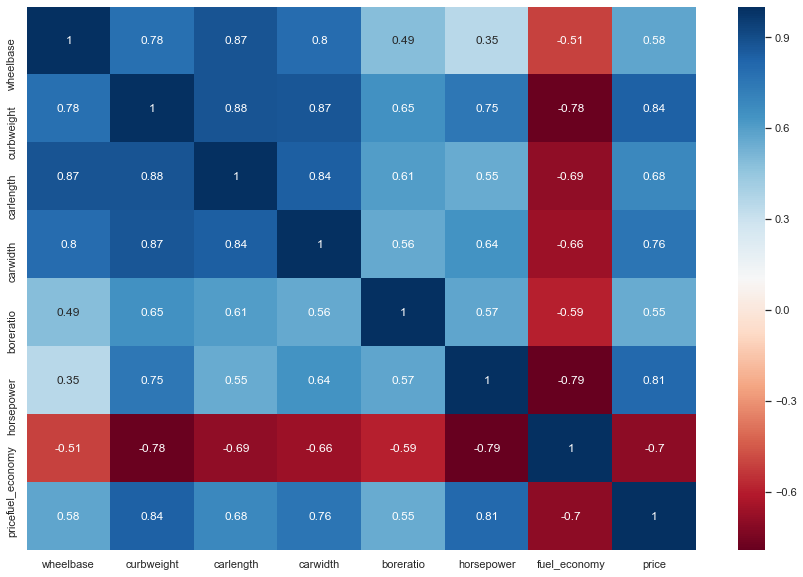

In [467]:
heat_map(car_sales_model)

### Now, as we have decided our starting variables for the model, we will transform the data for these  variables so that it can be used for the model. We will start with one hot encoding followed by MinMaxScaling.

## Dummy variables

In [468]:
columns_to_encode = [
    'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',
    'cylindernumber', 'fuelsystem', 'car_range'
]

for c in columns_to_encode:
    car_sales_model = pd.get_dummies(car_sales_model,
                                     prefix=[c],
                                     columns=[c],
                                     drop_first=True)

In [469]:
car_sales_model.head()

,wheelbase,curbweight,carlength,carwidth,boreratio,horsepower,fuel_economy,price,fueltype_gas,aspiration_turbo,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_range_middle_class,car_range_premium
car_ID,,,,,,,,,,,,,,,,,,,,,
1,88.6,2548,168.8,64.1,3.47,111,23.70,13495.0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,88.6,2548,168.8,64.1,3.47,111,23.70,16500.0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,94.5,2823,171.2,65.5,2.68,154,22.15,16500.0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,99.8,2337,176.6,66.2,3.19,102,26.70,13950.0,1,0,...,0,0,0,0,0,1,0,0,1,0
5,99.4,2824,176.6,66.4,3.19,115,19.80,17450.0,1,0,...,0,0,0,0,0,1,0,0,1,0


## Splitting the Data into Training and Testing Sets

In [470]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
car_sales_model_train, car_sales_model_test = train_test_split(car_sales_model, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [471]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [472]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [
    'wheelbase', 'curbweight', 'carwidth', 'carlength', 'boreratio',
    'horsepower', 'fuel_economy', 'price'
]

car_sales_model_train[num_vars] = scaler.fit_transform(
    car_sales_model_train[num_vars])

car_sales_model_train.head()

,wheelbase,curbweight,carlength,carwidth,boreratio,horsepower,fuel_economy,price,fueltype_gas,aspiration_turbo,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_range_middle_class,car_range_premium
car_ID,,,,,,,,,,,,,,,,,,,,,
123,0.244828,0.272692,0.426016,0.291667,0.230159,0.083333,0.530864,0.068818,1,0,...,0,1,0,0,0,0,0,0,0,0
126,0.272414,0.500388,0.452033,0.666667,1.000000,0.395833,0.213992,0.466890,1,0,...,0,0,0,0,0,1,0,0,1,0
167,0.272414,0.314973,0.448780,0.308333,0.444444,0.266667,0.344307,0.122110,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.068966,0.411171,0.450407,0.316667,0.626984,0.262500,0.244170,0.314446,1,0,...,0,0,0,0,0,1,0,0,1,0
200,0.610345,0.647401,0.775610,0.575000,0.746032,0.475000,0.122085,0.382131,1,1,...,0,0,0,0,0,1,0,0,1,0


### Dividing into X and Y sets for the model building

In [473]:
y_train = car_sales_model_train.pop('price')
X_train = car_sales_model_train

### Building our model

In [474]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [475]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [476]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 21),
 ('curbweight', True, 1),
 ('carlength', False, 20),
 ('carwidth', True, 1),
 ('boreratio', False, 16),
 ('horsepower', True, 1),
 ('fuel_economy', False, 22),
 ('fueltype_gas', False, 24),
 ('aspiration_turbo', False, 17),
 ('carbody_hardtop', False, 3),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', False, 2),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 18),
 ('drivewheel_rwd', False, 7),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 5),
 ('enginetype_ohc', False, 4),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 14),
 ('enginetype_rotor', False, 15),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 11),
 ('cylindernumber_three', False, 13),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 12),
 ('fuelsystem_2bbl', False, 19),
 ('fuelsystem_4bbl', False, 10),
 ('fuelsystem_idi', False, 25),
 ('fuelsystem_mfi', False, 27),
 ('fuelsystem_mpfi', Fal

In [477]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'carwidth', 'horsepower', 'carbody_hatchback',
       'carbody_wagon', 'enginetype_dohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_twelve', 'car_range_premium'],
      dtype='object')

In [478]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'boreratio', 'fuel_economy', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_sedan',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'car_range_middle_class'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [479]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [480]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [481]:
def model(df):
    lm = sm.OLS(y_train, X_train_rfe).fit() 
    print(lm.summary())

In [482]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Model 1

In [483]:
model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.41e-65
Time:                        15:20:30   Log-Likelihood:                 193.21
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     132   BIC:                            -331.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

In [484]:
vif(X_train_rfe)

,Features,VIF
0,const,28.77
1,curbweight,8.40
2,carwidth,5.67
3,horsepower,4.76
8,cylindernumber_four,2.52
10,car_range_premium,1.90
6,enginetype_dohcv,1.60
7,cylindernumber_five,1.58
4,carbody_hatchback,1.28
5,carbody_wagon,1.25


## Model 2

We can see `cylindernumber_five` has the highest p-value, so we will drop this column.

In [485]:
X_train_rfe = X_train_rfe.drop(["cylindernumber_five"], axis = 1)

model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     155.0
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           5.30e-66
Time:                        15:20:30   Log-Likelihood:                 191.50
No. Observations:                 143   AIC:                            -363.0
Df Residuals:                     133   BIC:                            -333.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

,Features,VIF
0,const,27.75
1,curbweight,8.15
2,carwidth,4.93
3,horsepower,4.53
7,cylindernumber_four,2.03
9,car_range_premium,1.90
6,enginetype_dohcv,1.60
4,carbody_hatchback,1.27
5,carbody_wagon,1.25
8,cylindernumber_twelve,1.25


# Model 3

In [486]:
# We can see `cylindernumber_twelve` has the highest p-value, so we will drop this column.# 
X_train_rfe = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.83e-66
Time:                        15:20:30   Log-Likelihood:                 189.83
No. Observations:                 143   AIC:                            -361.7
Df Residuals:                     134   BIC:                            -335.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0119    

,Features,VIF
0,const,27.19
1,curbweight,8.02
2,carwidth,4.92
3,horsepower,3.99
7,cylindernumber_four,1.98
8,car_range_premium,1.83
6,enginetype_dohcv,1.51
4,carbody_hatchback,1.27
5,carbody_wagon,1.25


# Model 4

In [487]:
# We can see `carwidth` has the highest p-value, so we will drop this column.# 
X_train_rfe = X_train_rfe.drop(["carwidth"], axis = 1)

model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     191.2
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           8.06e-67
Time:                        15:20:30   Log-Likelihood:                 187.85
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     135   BIC:                            -336.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0340    

,Features,VIF
0,const,22.97
2,horsepower,3.90
1,curbweight,3.61
6,cylindernumber_four,1.98
7,car_range_premium,1.83
5,enginetype_dohcv,1.37
3,carbody_hatchback,1.27
4,carbody_wagon,1.18


# Model 5

In [488]:
# We can see `enginetype_dohcv` has the highest p-value, so we will drop this column. 
X_train_rfe = X_train_rfe.drop(["enginetype_dohcv"], axis = 1)

model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     219.9
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.96e-67
Time:                        15:20:30   Log-Likelihood:                 186.44
No. Observations:                 143   AIC:                            -358.9
Df Residuals:                     136   BIC:                            -338.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0394    

,Features,VIF
0,const,22.61
1,curbweight,3.33
2,horsepower,3.17
5,cylindernumber_four,1.93
6,car_range_premium,1.76
3,carbody_hatchback,1.27
4,carbody_wagon,1.17


# Model 6

In [489]:
# We can see there are two variables based on carbody, we can try to drop one and see its impact on the model
X_train_rfe = X_train_rfe.drop(["carbody_wagon"], axis = 1)

model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     242.1
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           3.68e-66
Time:                        15:20:30   Log-Likelihood:                 180.40
No. Observations:                 143   AIC:                            -348.8
Df Residuals:                     137   BIC:                            -331.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0421    

,Features,VIF
0,const,22.59
1,curbweight,3.13
2,horsepower,3.11
4,cylindernumber_four,1.91
5,car_range_premium,1.74
3,carbody_hatchback,1.22
